# PCA dimensionality reduction of a UKBB Short-axis image

In [56]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

img1 = mpimg.imread('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/data_jpg/sa/output-frame000-slice000.jpg')

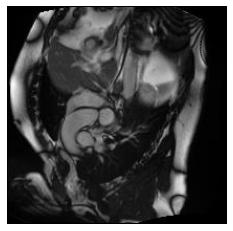

In [3]:
plt.axis('off')
plt.imshow(img1)
plt.show()
# plt.savefig('myfig.png') # To save the figure

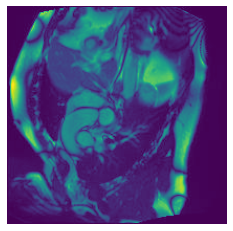

In [58]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray)
plt.show()

In [108]:
print(gray.shape)

'''
PROBLEM: Using the following failed to provide a proper reconstruction using PCA when 
image composed of 208 rows, 210*3 (or 630) pixels each
    img_r = np.reshape(img1, (208, 630)) 
    print(img_r.shape)
SOLUTION: Had to use the gray scaled version.
'''
print()

(208, 210)



### Formatting size for PCA
image composed of 208 rows, 210*3 (or 630) pixels each

Using the gray scale image after the transformed image using color (or the 3 factor) failed to yield good results

In [119]:
# Trying different N of components to check capacity to explain variance
ipca = PCA(5).fit(gray)
img_c = ipca.transform(gray) # This applies dimensionality reduction to the image without fitting data
# While ipca.fit_transform(X[,y]) would fit the model and apply dimensionality reduction on X

print('Image shape:', img_c.shape)
print('Variance ratio for 100 components:', np.sum(ipca.explained_variance_ratio_), '%')

'''
The explained variance ratio is the percentage of variance that is attributed by each of the selected components.
Ideally, you would choose the number of components to include in your model by adding the explained variance ratio
of each component until you reach a total of around 0.8 or 80% to avoid overfitting.
'''
print()

Image shape: (208, 5)
Variance ratio for 100 components: 0.7263240407761242 %



(208, 210)
(208, 210)


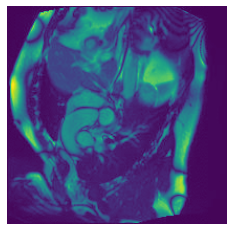

In [88]:
# Inversing the transform of the PCA output and reshape for visualization
temp = ipca.inverse_transform(img_c)
print(temp.shape)

#reshaping 630 back to the original 210 * 3
temp = np.reshape(temp, (208,210))

print(temp.shape)

plt.axis('off')
plt.imshow(temp)
plt.savefig('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_100.png')

## Trying different number of components and the corresponding variance ratio

| Components | Variance explained (%) |
:---:| :---: |
| **100** | 0.999547 | 
| **82** | 0.998617 | 
| **64** | 0.996201 | 
| **50** | 0.991584 | 
| **20** | 0.945643 | 
| **15** | 0.918860 | 
| **10** | 0.868467 | 
| **5** | 0.726324 | 
| **2** | 0.488129 |

In [3]:
import ipywidgets as widgets
import IPython.display as display

## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img1 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_2.png', 'rb').read()
img2 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_10.png', 'rb').read()
img3 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_15.png', 'rb').read()
img4 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_20.png', 'rb').read()
img5 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_50.png', 'rb').read()
img6 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_64.png', 'rb').read()
img7 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_82.png', 'rb').read()
img8 = open('/home/goncalo/Documents/thesisCode_bitbucket/itc-main-repo/Goncalo/goncalo/data/pca_scaled_images_ukbb/variance_100.png', 'rb').read()

## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi1 = widgets.Image(value=img1, format='png', width=300, height=400)
wi2 = widgets.Image(value=img2, format='png', width=300, height=400)
wi3 = widgets.Image(value=img3, format='png', width=300, height=400)
wi4 = widgets.Image(value=img4, format='png', width=300, height=400)
wi5 = widgets.Image(value=img5, format='png', width=300, height=400)
wi6 = widgets.Image(value=img6, format='png', width=300, height=400)
wi7 = widgets.Image(value=img7, format='png', width=300, height=400)
wi8 = widgets.Image(value=img8, format='png', width=300, height=400)

## Side by side thanks to HBox widgets
sidebyside1 = widgets.HBox([wi1, wi2])
sidebyside2 = widgets.HBox([wi3, wi4])
sidebyside3 = widgets.HBox([wi5, wi6])
sidebyside4 = widgets.HBox([wi7, wi8])


## Finally, show.
print('a)        Using 2 components:                 Using 10 components:')
print('          (Yielding 49% Var)                  (Yielding 87% Var)')
display.display(sidebyside1)
print('b)        Using 15 components:                Using 20 components:')
print('          (Yielding 92% Var)                  (Yielding 95% Var)')
display.display(sidebyside2)
print('c)        Using 50 components:                Using 64 components:')
print('          (Yielding 99% Var)                  (Yielding 100% Var)')
display.display(sidebyside3)
print('d)        Using 82 components:                Using 100 components:')
print('          (Yielding 100% Var)                 (Yielding 100% Var)')
display.display(sidebyside4)

a)        Using 2 components:                 Using 10 components:
          (Yielding 49% Var)                  (Yielding 87% Var)


b)        Using 15 components:                Using 20 components:
          (Yielding 92% Var)                  (Yielding 95% Var)


c)        Using 50 components:                Using 64 components:
          (Yielding 99% Var)                  (Yielding 100% Var)


d)        Using 82 components:                Using 100 components:
          (Yielding 100% Var)                 (Yielding 100% Var)


# Observing the effects of transformations on the vectorized image and the PCA dimensionality reduction

PCA(n_components=2)

[[-346.94170582  307.75575531]
 [-185.87673146  103.37017483]
 [-188.37558605   88.96624063]
 [-188.83799638   71.58994615]
 [-207.12210348   64.03895297]
 [-243.3104334    -8.12388391]
 [-233.95270269 -104.31282633]
 [-221.49815596 -137.11707597]
 [-205.22748215 -179.12225054]
 [-183.16232431 -224.42458317]
 [-157.44957521 -261.24186471]
 [-127.41269629 -282.12858138]
 [ -92.16291579 -303.32295041]
 [ -87.11360254 -327.82988732]
 [ -83.11413464 -341.40570857]
 [ -62.57646154 -346.97497377]
 [ -54.07451599 -362.40286833]
 [ -39.93818834 -384.12814775]
 [ -28.29354297 -396.15167897]
 [ -17.37427094 -377.18500035]
 [   1.43552652 -351.91035148]
 [  12.3775966  -345.71593954]
 [   2.29906827 -359.29232591]
 [ -14.18440715 -374.83573575]
 [ -26.6792081  -368.14938896]
 [ -56.32436697 -348.08041382]
 [ -75.21037534 -327.56304241]
 [ -77.53270285 -311.57592996]
 [ -83.50726305 -280.90232832]
 [ -93.04803497 -226.36953767]
 [ -97.2082764  -176.94317889]
 [ -95.72327769 -1

(208, 2)



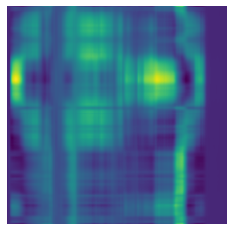

(208, 210)



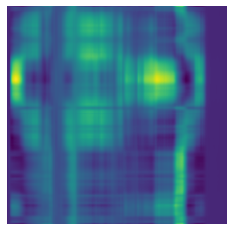

(208, 210)


In [132]:
ipca = PCA(2).fit(gray)
print(ipca)
print()

img_c = ipca.transform(gray)
print(img_c)
plt.axis('off')
plt.imshow(img_c)
plt.show()
print(img_c.shape)
print()

temp = ipca.inverse_transform(img_c)
plt.axis('off')
plt.imshow(temp)
plt.show()
print(temp.shape)
print()

temp = np.reshape(temp, (208,210))
plt.axis('off')
plt.imshow(temp)
plt.show()
print(temp.shape)